# Title: Convert shapefile to geojson (data from ECY)

## We get the shorelines from the WA dept of ecology, in form of a shapefile referenced in EPSG:2286. We convert it to EPSG 4326, which is the longitude/latitude projection, and then we output it as a geojson file.

In [63]:
import geopandas as gpd
import json

In [112]:
import re
import os


In [113]:
import pyproj

In [114]:
from shapely.geometry import Point, LineString

In [ ]:

#this cell pulls out every shapefile in the directory and puts them into a list

directory_path = 'WA_ECY_historic_shorelines'

pattern = re.compile(r'.*\.shp$')

filenames=[]

for filename in os.listdir(directory_path):
    if pattern.match(filename):
        filenames.append(filename)
        #print(filename)



In [109]:
#the output is a list of all the .shp filenames in the directory
print(filenames)


['shore_1997.shp', 'shore_196x.shp', 'shore_2015wa_2016or.shp', 'shore_1942.shp', 'shore_1995.shp', 'shore_197x.shp', 'shore_2005or_2006wa.shp', 'shore_192x.shp', 'shore_2001.shp', 'shore_198x.shp', 'shore_1999.shp', 'shore_195x.shp']


In [168]:
# now let's read in the shapefiles
# we'll use a dictionary named dict_shp to store the shapefiles

dict_shp={}

#namelist=[]

for filename in filenames:
    read_name="WA_ECY_historic_shorelines/"+filename
    dict_name=filename.split("e_")[1][:-4]
    #namelist.append(dict_name)
    dict_shp[dict_name]=gpd.read_file(read_name)
    print(dict_shp[dict_name].crs)

PROJCS["NAD_1983_StatePlane_Washington_South_FIPS_4602",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",45.3333333333333],PARAMETER["central_meridian",-120.5],PARAMETER["standard_parallel_1",45.8333333333333],PARAMETER["standard_parallel_2",47.3333333333333],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["NAD_1983_StatePlane_Washington_South_FIPS_4602",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",45.3333333333333],PARAMETER["central_meridian",-120.5],PARAMETER["standard_parallel_1",45.8333333333333],PARAMETER["standard_parallel_

In [167]:
dict_shp["192x"].crs

<Derived Projected CRS: EPSG:32149>
Name: NAD83 / Washington South
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [131]:
#the keys of the dictionary
dict_shp.keys()


dict_keys(['1997', '196x', '2015wa_2016or', '1942', '1995', '197x', '2005or_2006wa', '192x', '2001', '198x', '1999', '195x'])

In [111]:
#dict_shp["2015wa_2016or"]

In [140]:
#this cell creates a function to convert the state plane coordinates to geographic coordinates


proj = pyproj.Transformer.from_crs(2286, 4326, always_xy=True)   # 2286 is the state plane coordinate system for Washington State south, 4326 is the WGS84 coordinate system



# Convert State Plane coordinates to geographic coordinates

def convert_to_latlon(easting, northing):
    longitude, latitude = proj.transform(easting, northing)
    return (longitude, latitude)


In [141]:
#this cell convert the state plane coordinates to geographic coordinates with the function created above
for name in dict_shp.keys():
    for i in range(len(dict_shp[name]["geometry"])):
        if dict_shp[name]["geometry"][i]==None:
            continue
        dict_shp[name]["geometry"][i]=LineString([convert_to_latlon(dict_shp[name]["geometry"][i].coords[j][0],dict_shp[name]["geometry"][i].coords[j][1]) for j in range(len(dict_shp[name]["geometry"][i].coords))])

In [142]:
dict_shp["2015wa_2016or"]

,OBJECTID,YEAR,MONTH,DAY,PHOTO,Shape_Leng,geometry
0,1,2015,8,16,'NAIP 2015',3457.606606,"LINESTRING (-126.062 45.700, -126.062 45.700, ..."
1,2,2015,8,16,'NAIP 2015',830.471795,"LINESTRING (-126.050 45.693, -126.050 45.693, ..."
2,3,2015,9,28,'NAIP 2015',3218.256327,"LINESTRING (-126.049 45.691, -126.049 45.691, ..."
3,4,2015,8,16,'NAIP 2015',1827.454264,"LINESTRING (-126.046 45.682, -126.046 45.682, ..."
4,5,2015,9,28,'NAIP 2015',4967.382150,"LINESTRING (-126.044 45.678, -126.044 45.677, ..."
5,6,2015,8,16,'NAIP 2015',3132.625669,"LINESTRING (-126.040 45.664, -126.040 45.664, ..."
6,7,2015,9,28,'NAIP 2015',3312.593348,"LINESTRING (-126.040 45.656, -126.040 45.656, ..."
7,8,2015,8,16,'NAIP 2015',4672.235564,"LINESTRING (-126.039 45.647, -126.039 45.647, ..."
8,9,2015,8,16,'NAIP 2015',715.171109,"LINESTRING (-126.027 45.641, -126.026 45.641, ..."
9,10,2015,8,16,'NAIP 2015',548.772073,"LINESTRING (-126.057 45.702, -126.057 45.702, ..."


## EPSG 2286 seems not working, so we use EPSG 3691 instead

In [146]:
#read the shoreline files

dict_shp={}

#namelist=[]

for filename in filenames:
    read_name="WA_ECY_historic_shorelines/"+filename
    dict_name=filename.split("e_")[1][:-4]
    #namelist.append(dict_name)
    dict_shp[dict_name]=gpd.read_file(read_name)

In [147]:
proj_3691 = pyproj.Transformer.from_crs(3691, 4326, always_xy=True)   # 2286 is the state plane coordinate system for Washington State south, 4326 is the WGS84 coordinate system



# Convert State Plane coordinates to geographic coordinates

def convert_to_latlon(easting, northing):
    longitude, latitude = proj_3691.transform(easting, northing)
    return (longitude, latitude)

In [148]:
#this cell convert the state plane coordinates to geographic coordinates with the function created above
for name in dict_shp.keys():
    for i in range(len(dict_shp[name]["geometry"])):
        if dict_shp[name]["geometry"][i]==None:
            continue
        dict_shp[name]["geometry"][i]=LineString([convert_to_latlon(dict_shp[name]["geometry"][i].coords[j][0],dict_shp[name]["geometry"][i].coords[j][1]) for j in range(len(dict_shp[name]["geometry"][i].coords))])

In [149]:
dict_shp["2015wa_2016or"]

,OBJECTID,YEAR,MONTH,DAY,PHOTO,Shape_Leng,geometry
0,1,2015,8,16,'NAIP 2015',3457.606606,"LINESTRING (-124.175 46.928, -124.175 46.928, ..."
1,2,2015,8,16,'NAIP 2015',830.471795,"LINESTRING (-124.134 46.905, -124.134 46.904, ..."
2,3,2015,9,28,'NAIP 2015',3218.256327,"LINESTRING (-124.131 46.898, -124.131 46.897, ..."
3,4,2015,8,16,'NAIP 2015',1827.454264,"LINESTRING (-124.120 46.870, -124.120 46.869, ..."
4,5,2015,9,28,'NAIP 2015',4967.382150,"LINESTRING (-124.115 46.854, -124.114 46.853, ..."
5,6,2015,8,16,'NAIP 2015',3132.625669,"LINESTRING (-124.104 46.810, -124.104 46.809, ..."
6,7,2015,9,28,'NAIP 2015',3312.593348,"LINESTRING (-124.105 46.782, -124.105 46.781, ..."
7,8,2015,8,16,'NAIP 2015',4672.235564,"LINESTRING (-124.103 46.754, -124.102 46.753, ..."
8,9,2015,8,16,'NAIP 2015',715.171109,"LINESTRING (-124.061 46.733, -124.061 46.732, ..."
9,10,2015,8,16,'NAIP 2015',548.772073,"LINESTRING (-124.156 46.936, -124.155 46.935, ..."


## We can also use EPSG 2856

In [150]:
#read the shoreline files

dict_shp={}

#namelist=[]

for filename in filenames:
    read_name="WA_ECY_historic_shorelines/"+filename
    dict_name=filename.split("e_")[1][:-4]
    #namelist.append(dict_name)
    dict_shp[dict_name]=gpd.read_file(read_name)

In [151]:
proj_2856 = pyproj.Transformer.from_crs(2856, 4326, always_xy=True)   # 2286 is the state plane coordinate system for Washington State south, 4326 is the WGS84 coordinate system



# Convert State Plane coordinates to geographic coordinates

def convert_to_latlon(easting, northing):
    longitude, latitude = proj_2856.transform(easting, northing)
    return (longitude, latitude)

In [152]:
#this cell convert the state plane coordinates to geographic coordinates with the function created above
for name in dict_shp.keys():
    for i in range(len(dict_shp[name]["geometry"])):
        if dict_shp[name]["geometry"][i]==None:
            continue
        dict_shp[name]["geometry"][i]=LineString([convert_to_latlon(dict_shp[name]["geometry"][i].coords[j][0],dict_shp[name]["geometry"][i].coords[j][1]) for j in range(len(dict_shp[name]["geometry"][i].coords))])

In [153]:
dict_shp["2015wa_2016or"]

,OBJECTID,YEAR,MONTH,DAY,PHOTO,Shape_Leng,geometry
0,1,2015,8,16,'NAIP 2015',3457.606606,"LINESTRING (-124.175 46.928, -124.175 46.928, ..."
1,2,2015,8,16,'NAIP 2015',830.471795,"LINESTRING (-124.134 46.905, -124.134 46.904, ..."
2,3,2015,9,28,'NAIP 2015',3218.256327,"LINESTRING (-124.131 46.898, -124.131 46.897, ..."
3,4,2015,8,16,'NAIP 2015',1827.454264,"LINESTRING (-124.120 46.870, -124.120 46.869, ..."
4,5,2015,9,28,'NAIP 2015',4967.382150,"LINESTRING (-124.115 46.854, -124.114 46.853, ..."
5,6,2015,8,16,'NAIP 2015',3132.625669,"LINESTRING (-124.104 46.810, -124.104 46.809, ..."
6,7,2015,9,28,'NAIP 2015',3312.593348,"LINESTRING (-124.105 46.782, -124.105 46.781, ..."
7,8,2015,8,16,'NAIP 2015',4672.235564,"LINESTRING (-124.103 46.754, -124.102 46.753, ..."
8,9,2015,8,16,'NAIP 2015',715.171109,"LINESTRING (-124.061 46.733, -124.061 46.732, ..."
9,10,2015,8,16,'NAIP 2015',548.772073,"LINESTRING (-124.156 46.936, -124.155 46.935, ..."


## USE ´EPSG 32149´

In [162]:
#read the shoreline files

dict_shp={}

#namelist=[]

for filename in filenames:
    read_name="WA_ECY_historic_shorelines/"+filename
    dict_name=filename.split("e_")[1][:-4]
    #namelist.append(dict_name)
    dict_shp[dict_name]=gpd.read_file(read_name)


proj_32149 = pyproj.Transformer.from_crs(32149, 4326, always_xy=True)   # 2286 is the state plane coordinate system for Washington State south, 4326 is the WGS84 coordinate system



# Convert State Plane coordinates to geographic coordinates

def convert_to_latlon(easting, northing):
    longitude, latitude = proj_32149.transform(easting, northing)
    return (longitude, latitude)


#this cell convert the state plane coordinates to geographic coordinates with the function created above
for name in dict_shp.keys():
    for i in range(len(dict_shp[name]["geometry"])):
        if dict_shp[name]["geometry"][i]==None:
            continue
        dict_shp[name]["geometry"][i]=LineString([convert_to_latlon(dict_shp[name]["geometry"][i].coords[j][0],dict_shp[name]["geometry"][i].coords[j][1]) for j in range(len(dict_shp[name]["geometry"][i].coords))])


dict_shp["2015wa_2016or"]

,OBJECTID,YEAR,MONTH,DAY,PHOTO,Shape_Leng,geometry
0,1,2015,8,16,'NAIP 2015',3457.606606,"LINESTRING (-124.175 46.928, -124.175 46.928, ..."
1,2,2015,8,16,'NAIP 2015',830.471795,"LINESTRING (-124.134 46.905, -124.134 46.904, ..."
2,3,2015,9,28,'NAIP 2015',3218.256327,"LINESTRING (-124.131 46.898, -124.131 46.897, ..."
3,4,2015,8,16,'NAIP 2015',1827.454264,"LINESTRING (-124.120 46.870, -124.120 46.869, ..."
4,5,2015,9,28,'NAIP 2015',4967.382150,"LINESTRING (-124.115 46.854, -124.114 46.853, ..."
5,6,2015,8,16,'NAIP 2015',3132.625669,"LINESTRING (-124.104 46.810, -124.104 46.809, ..."
6,7,2015,9,28,'NAIP 2015',3312.593348,"LINESTRING (-124.105 46.782, -124.105 46.781, ..."
7,8,2015,8,16,'NAIP 2015',4672.235564,"LINESTRING (-124.103 46.754, -124.102 46.753, ..."
8,9,2015,8,16,'NAIP 2015',715.171109,"LINESTRING (-124.061 46.733, -124.061 46.732, ..."
9,10,2015,8,16,'NAIP 2015',548.772073,"LINESTRING (-124.156 46.936, -124.155 46.935, ..."


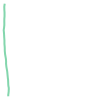

## Output as geojson file

In [155]:
print(dict_shp.keys())

dict_keys(['1997', '196x', '2015wa_2016or', '1942', '1995', '197x', '2005or_2006wa', '192x', '2001', '198x', '1999', '195x'])


In [157]:
#dict_shp["2015wa_2016or"]

In [158]:
import geojson

In [164]:
#write geojson files

for key in dict_shp.keys():
    with open("ECY_historical_shorelines_epsg32149/"+str(key)+".geojson", 'w', encoding='utf-8') as f:
        geojson.dump(dict_shp[key], f, ensure_ascii=False, indent=4)

In [161]:
#test whether we can open the geojson file we just created
with open("ECY_historical_shorelines_epsg2856/192x.geojson", "r") as f:
    gjf=json.load(f)
    print(type(gjf))

len(gjf["features"])

<class 'dict'>


60

In [104]:
"""import json

json_string = '{"name": "John", "age": 30, "city": "New York"}'
dictionary = json.loads(json_string)

print(type(json_string),type(dictionary))"""


<class 'str'> <class 'dict'>
